# Mag TOV

In [1]:
using Plots
include("../../Utils/misc.jl")

Main.Misc

## Uniform Grid

### Strong Scaling (M/day)

G32: [2621.161342745214, 5045.409712203001, 9140.329639785541, 15069.726562953963, 19649.340536794953]
G64: [4489.887520104016, 8479.934093948417, 15142.272188943058, 21740.779951531425, 26642.02701047104]
G128: [5181.1598905850715, 9663.473862048984, 16285.020421889587, 25353.832184526775, 29795.429406893825]
G256: [5208.776014014187, 9662.638202791724, 16747.55242467197, 25101.71257701979, 30664.72130119487]
G64: [1115.278983191225, 2092.522368775409, 3439.8881981621557]
G128: [647.6903714098147, 1248.7427854692878, 2348.8235267282544, 4072.459624022176, 6206.78528349545]
G256: [650.4980402124329, 1255.1426903220765, 2380.1383265126055, 4134.110622663795, 6390.989764182269]


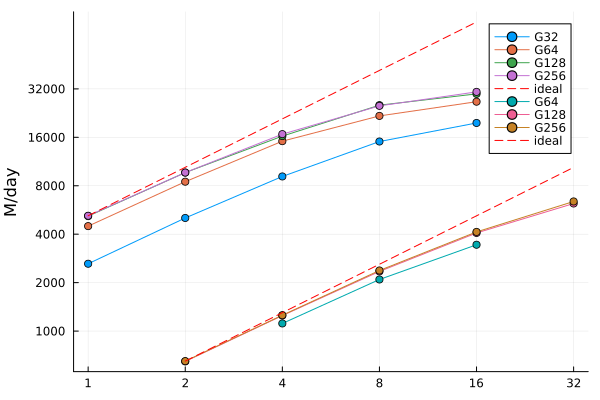

In [2]:
let patt_dirs_n256 = ([
        (r"Cow_UNI_G32-N\d+-MPI\d+_r0000", "G32"),
        (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
        (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
        (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
    ], "../data/magTOV/magTOV-n256"),
    patt_dirs_n512 = ([
        #(r"Cow_UNI_G32-N\d+-MPI\d+_r0000", "G32"),
        (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
        (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
        (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
    ], "../data/magTOV/magTOV-n512")

    # Initialize the plot
    plt = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [1, 2, 4, 8, 16, 32]
    xticks!(plt, xs, [string(n) for n in xs])
    ys = [1000, 2000, 4000, 8000, 16000, 32000]
    yticks!(plt, ys, [string(n) for n in ys])
    
    # Process datasets
    for (patterns, parent_dir) in [patt_dirs_n256, patt_dirs_n512]
        # Load averages for the given patterns and directory
        (dats, labs) = Misc.load_avgs(patterns, parent_dir; option="TotalComputeTime")

        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[2], label=labs[i], marker=:circle)
            println("$(labs[i]): ", dat[2])
        end

        # Add the "ideal" reference plot
        x_ref, y_ref = dats[end]  # choose the last dataset as the reference
        ideal_y = y_ref[1] .* (x_ref ./ x_ref[1])  # compute the ideal scaling line
        plot!(plt, x_ref, ideal_y; label="ideal", linestyle=:dash, color=:red)
    end
    display(plt)
end

### Strong Scaling (Zcs/sec)

G32: [1.2913359375e7, 2.48502875e7, 4.4958675e7, 7.4204975e7, 9.6848559375e7]
G64: [2.213431875e7, 4.1785596875e7, 7.4605440625e7, 1.07119765625e8, 1.31261e8]
G128: [2.55645375e7, 4.7655346875e7, 8.0308865625e7, 1.2510784375e8, 1.4696075e8]
G256: [2.5721240625e7, 4.769533125e7, 8.261421875e7, 1.2394146875e8, 1.5109775e8]
G64: [8.79473375e7, 1.649955625e8, 2.7310290625e8]
G128: [5.075715625e7, 9.8576184375e7, 1.8568828125e8, 3.21282e8, 4.8991434375e8]
G256: [5.125045e7, 9.90821125e7, 1.8787484375e8, 3.26278125e8, 5.0440178125e8]


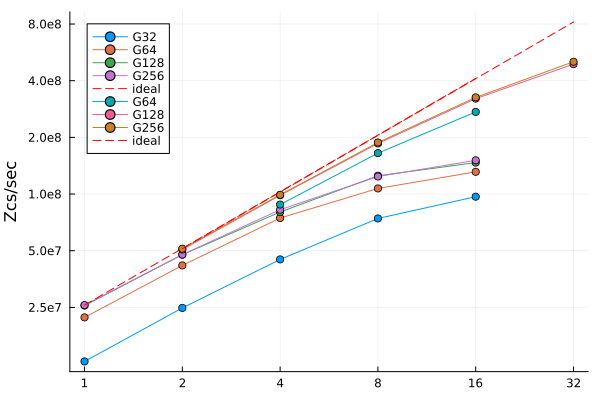

In [3]:
let patt_dirs_n256 = ([
        (r"Cow_UNI_G32-N\d+-MPI\d+_r0000", "G32"),
        (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
        (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
        (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
    ], "../data/magTOV/magTOV-n256"),
    patt_dirs_n512 = ([
        #(r"Cow_UNI_G32-N\d+-MPI\d+_r0000", "G32"),
        (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
        (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
        (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
    ], "../data/magTOV/magTOV-n512")

    # Initialize the plot
    plt = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [1, 2, 4, 8, 16, 32]
    xticks!(plt, xs, [string(n) for n in xs])
    ys = [2.5e7, 5e7, 1e8, 2e8, 4e8, 8e8]
    yticks!(plt, ys, [string(n) for n in ys])
    
    # Process datasets
    for (patterns, parent_dir) in [patt_dirs_n256, patt_dirs_n512]
        # Load averages for the given patterns and directory
        (dats, labs) = Misc.load_avgs(patterns, parent_dir; option="ZcsPerSecond")

        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[2], label=labs[i], marker=:circle)
            println("$(labs[i]): ", dat[2])
        end

        # Add the "ideal" reference plot
        x_ref, y_ref = dats[end]
        ideal_y = y_ref[1] .* (x_ref ./ x_ref[1])  # compute the ideal scaling line
        plot!(plt, x_ref, ideal_y; label="ideal", linestyle=:dash, color=:red)
    end
    display(plt)
end

### Speed

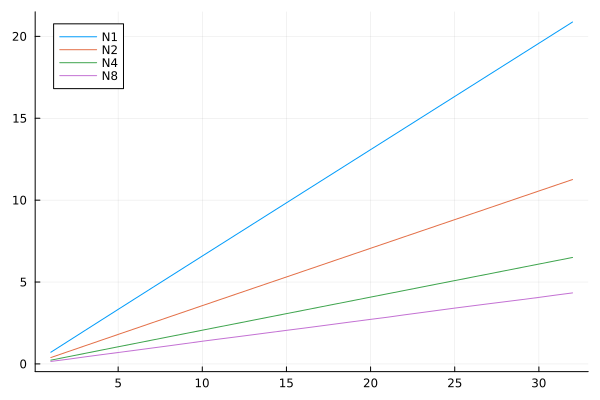

In [4]:
let dirs = [
        ("Cow_UNI_G256-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G256-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G256-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G256-N8-MPI8_r0000/stdout.txt", "N8"),
    ]
    (dats, labs) = Misc.load_data(dirs, "../data/magTOV/magTOV-n256", "TotalComputeTime")
    #
    plt = plot()
    for (i, dat) in enumerate(dats)
        plot!(plt, dat[1], dat[3], label=labs[i])
    end
    display(plt)
end

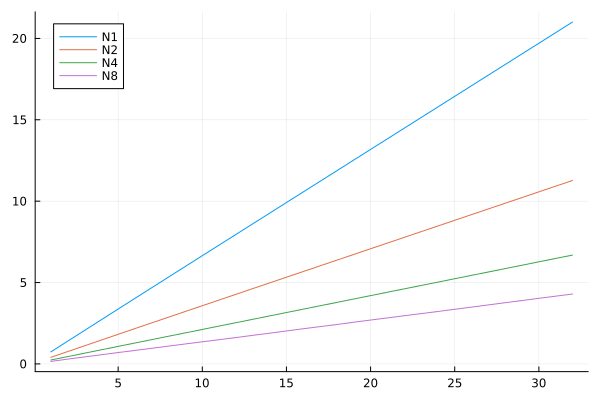

In [5]:
let dirs = [
        ("Cow_UNI_G128-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G128-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G128-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G128-N8-MPI8_r0000/stdout.txt", "N8"),
    ]
    (dats, labs) = Misc.load_data(dirs, "../data/magTOV/magTOV-n256", "TotalComputeTime")
    #
    plt = plot()
    for (i, dat) in enumerate(dats)
        plot!(plt, dat[1], dat[3], label=labs[i])
    end
    display(plt)
end

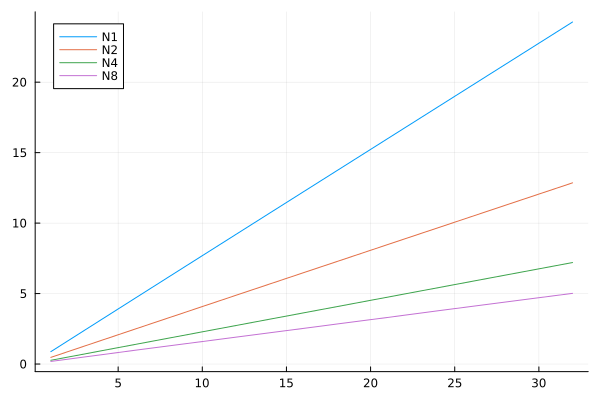

In [6]:
let dirs = [
        ("Cow_UNI_G64-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G64-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G64-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G64-N8-MPI8_r0000/stdout.txt", "N8"),
    ]
    (dats, labs) = Misc.load_data(dirs, "../data/magTOV/magTOV-n256", "TotalComputeTime")
    #
    plt = plot()
    for (i, dat) in enumerate(dats)
        plot!(plt, dat[1], dat[3], label=labs[i])
    end
    display(plt)
end

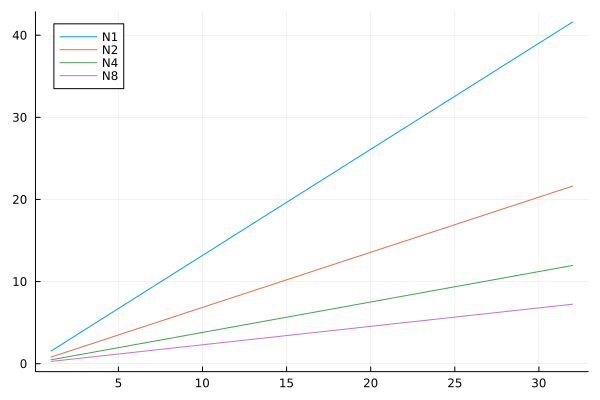

In [7]:
let dirs = [
        ("Cow_UNI_G32-N1-MPI1_r0000/stdout.txt", "N1"),
        ("Cow_UNI_G32-N2-MPI2_r0000/stdout.txt", "N2"),
        ("Cow_UNI_G32-N4-MPI4_r0000/stdout.txt", "N4"),
        ("Cow_UNI_G32-N8-MPI8_r0000/stdout.txt", "N8"),
    ]
    (dats, labs) = Misc.load_data(dirs, "../data/magTOV/magTOV-n256", "TotalComputeTime")
    #
    plt = plot()
    for (i, dat) in enumerate(dats)
        plot!(plt, dat[1], dat[3], label=labs[i])
    end
    display(plt)
end